# Tech Challenge

>Aluno: Lucas Silveira Campos 

>RM: rm364591

# Instruções

## O problema
>Você é um(a) profissional encarregado(a) de desenvolver um modelo preditivo de regressão para prever o valor dos custos médicos individuais cobrados pelo seguro de saúde.

## Tarefas

### Exploração de dados:

>Carregue a base de dados e explore suas características;
>análise estatísticas descritivas e visualize distribuições relevantes.

### Pré-Processamento de dados:

>Realize a limpeza dos dados, tratando valores ausentes (se necessário);
> Converta variáveis categóricas em formatos adequados para modelagem.

### Modelagem

>Crie um modelo $preditivo de regressão$ utilizando uma técnica à sua escolha (por exemplo: Regressão Linear, Árvore de Decisão, etc);

### Treinamento e avaliação do modelo:
>Treine o modelo com o conjunto de treinamento.

### Validação estatística:
>Utilize métricas estatísticas para validar a eficácia do modelo (p-value, intervalos de confiança).

### Elabore um relatório que inclua uma análise dos resultados, insights obtidos e validação estatística.

### Entregável:
>Vídeo junto com link do github do projeto e o código desenvolvido, apresentando passo a passo do que foi utilizado, como a fonte de dados e como os modelos foram criados.

> O vídeo deve estar disponível em uma plataforma como o Youtube e deve contar até 10 minutos.


## Sobre o projeto:

>Desenvolver um modelo preditivo de regressão para prever o valor dos custos médicos individuais cobrados pelo seguro de saúde.



## Considerações do dataset (fonte: kaggle)
https://www.kaggle.com/datasets/karthikeyanrajuz/medical-insurance-prediction-dataset?resource=download
>O campo patient_id foi o único ignorado na análise

## Modelo preditivo de regressão escolhido:
>A definir

In [2]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


### Biliotecas:

    Numpy
    Pandas
    Matplotlib
    Scikit-learn

In [3]:
pip install pandas numpy matplotlib scikit-learn openpyxl

Note: you may need to restart the kernel to use updated packages.


### Importando Bibliotecas

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

# Tratando os dados
> Construindo o DataFrame

In [5]:
dataFrameRaw = pd.read_excel('Dataset.xlsx')
dataFrameRaw = dataFrameRaw.drop('patient_id', axis=1)

# As colunas a seguir precisam ser tratadas por um Label Encoder pois sao valores não numericos
colunasATratarComLabelEncoder = [
    'patient_occupation',
    'patient_gender',
    'patient_smoking_status',
    'patient_location',
    'patient_covered_by_other_insurance_company',
    'patient_alcohol_consumption',
    'patient_exercise_regimen'
]

# O campo sobre o nível de colesterol do cliente usa um formato de intervalo contendo uma string no meio, portanto foi necessário criar uma função para fazer a média do intervalo
# A função abaixo serve especificamente para o campo de nivel de colesterol
def calculate_median_from_range_string(range_string):
    """
    Calcula a média para o campo "patient_cholesterol_level", pois o campo está em um formato de intervalo

    Args:
        range_string (str): Uma string provinda da coluna "patient_cholesterol_level" que contém uma representação de um intervalo (ex. '150 to 175').

    Returns:
        média do nível de colesterol do paciente.
    """
    if isinstance(range_string, str):
        try:
            # Separa os números que estão entre a palavra "to" função .split()
            nums_str = range_string.split(' to ')
            if len(nums_str) == 2:

                num1 = float(nums_str[0].strip())
                num2 = float(nums_str[1].strip())
                return (num1 + num2) / 2
            else:
                # Retorna um tipo de float chamado NaN (Not a number) para indicar que a conversão falhou.
                return np.nan
        except ValueError:
            # 2a tratativa de erro para não interromper o código utilizando NaN
            return np.nan
    elif pd.isna(range_string):
        # 3a tratativa de erro para não interromper o código utilizando NaN
        return np.nan
    else:
        # 3a tratativa de erro para não interromper o código utilizando NaN
        return np.nan


# Aqui fica a principal função de tratamento dos dados
# Optei por remover os clientes com 'Unkown' (desconhecido) e os que possuiam valores nulos não regulares 
def label_encode_and_clean(df, columns_to_encode):
    """
    Essa função de tratamento de dados remove os valores nulos, as linhas com 'Unkown' na tabela,
    aplica a técnica de Label Enconding em colunas com valores não numericos e utiliza a função
    criada para tratar o campo de colesterol do paciente para manter um dataframe conciso.

    Args:
        df (pd.DataFrame): O DataFrame a ser tratado.
        columns_to_encode (list): A lista de colunas que devem passar por Label Enconding.

    Returns:
        pd.DataFrame: 
                      Retorna o dataframe tratado
    """
    cleaned_df = df.copy() # Cria uma copia para não modificar o dataframe original

    # Nessa parte é utilizada a Função, criada anteriormente, que faz a média do nível de colesterol do paciente
    cholesterol_col = 'patient_cholesterol_level'
    if cholesterol_col in cleaned_df.columns:
        cleaned_df[cholesterol_col] = cleaned_df[cholesterol_col].apply(calculate_median_from_range_string)
        print(f"Processada a coluna '{cholesterol_col}' e média calculada.")
    else:
        print(f"Aviso: coluna '{cholesterol_col}' não foi encontrada. Pulando para a proxima etapa.")


    # Verifica se a as colunas colunasATratarComLabelEncoder estao na tabela.
    # Não necessario nesse projeto, pois os códigos foram feitos sob medida com o banco de dados em mãos
    # Mas achei valido manter essa sugestao de algoritmo gerado. Até para referencia futura.
    if not all(col in cleaned_df.columns for col in columns_to_encode):
        missing_cols = [col for col in columns_to_encode if col not in cleaned_df.columns]
        print(f"Error: A seguinte coluna não foi encontrada no dataframe: {missing_cols}")
        return None

    # Parte que remove os clientes com algum campo 'Unknow' 
        # (mantive os comentários originais abaixo)
        # Create a boolean mask that is True for rows that *do not* contain 'Unknown'
        # convert to string type before checking for 'Unknown'
    unknown_mask = ~(cleaned_df.astype(str).apply(lambda x: x.str.contains('Unknown', na=False)).any(axis=1))
    cleaned_df = cleaned_df[unknown_mask].copy() # Use .copy() to avoid SettingWithCopyWarning

    # 3. Remove as linhas que nao contem valores com a função dropna (drop not available)
    cleaned_df.dropna(inplace=True)

    # 4. Parte que aplica o Label Enconding as colunas especificadas em colunasATratarComLabelEncoder.
    label_encoder = LabelEncoder()
    for col in columns_to_encode:
        if col in cleaned_df.columns: # Verifica se a Coluna ainda existe após remover os NaNs
             cleaned_df[col] = cleaned_df[col].astype('category')
             cleaned_df[col] = label_encoder.fit_transform(cleaned_df[col])
        else:
            print(f"Aviso: Coluna '{col}' não encontrada após remover NaN's (Not a Number).")


    return cleaned_df


dataFrame = label_encode_and_clean(dataFrameRaw, colunasATratarComLabelEncoder)


media_colunas = dataFrame.median()


Processed 'patient_cholesterol_level' column: calculated median from range strings.


## Funções para analisar o dataframe de forma visual

Quantidade de valores NaN encontrados na coluna: 0


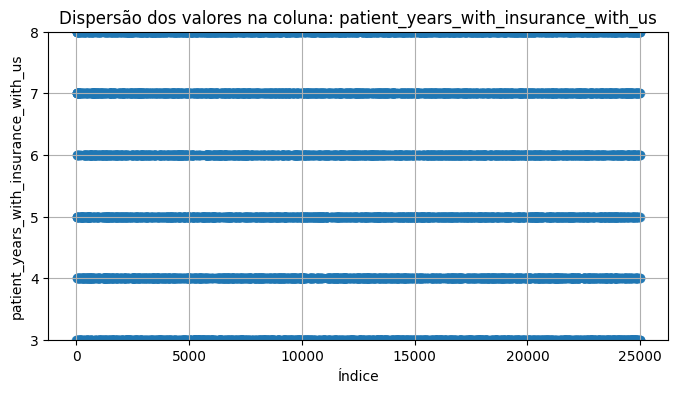

Quantidade de valores NaN encontrados na coluna: 0


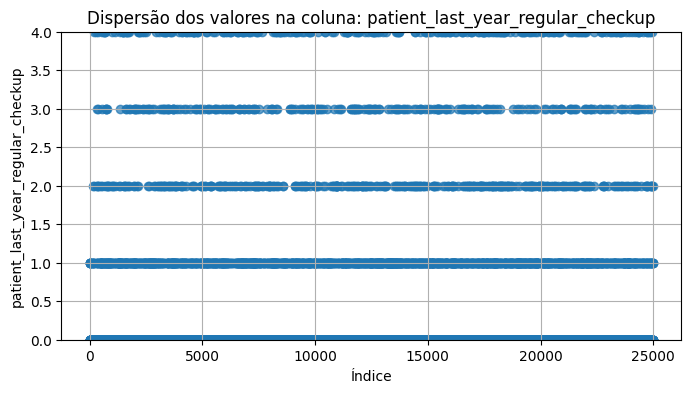

Quantidade de valores NaN encontrados na coluna: 0


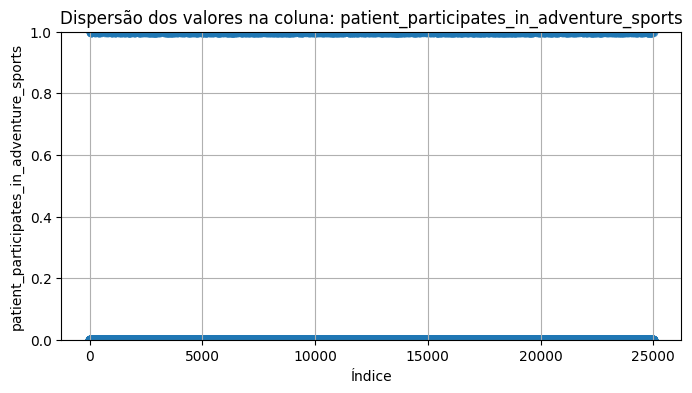

Quantidade de valores NaN encontrados na coluna: 0


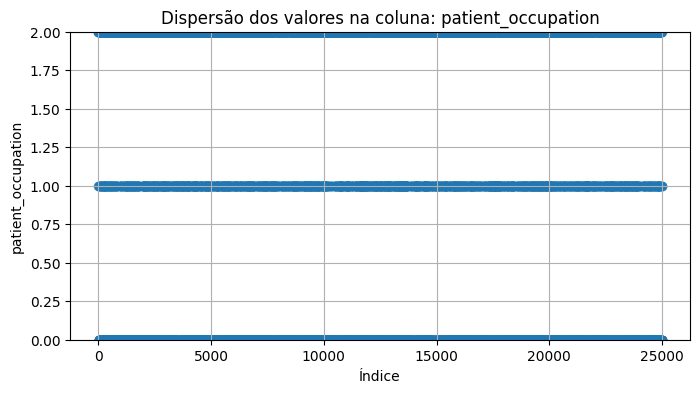

Quantidade de valores NaN encontrados na coluna: 0


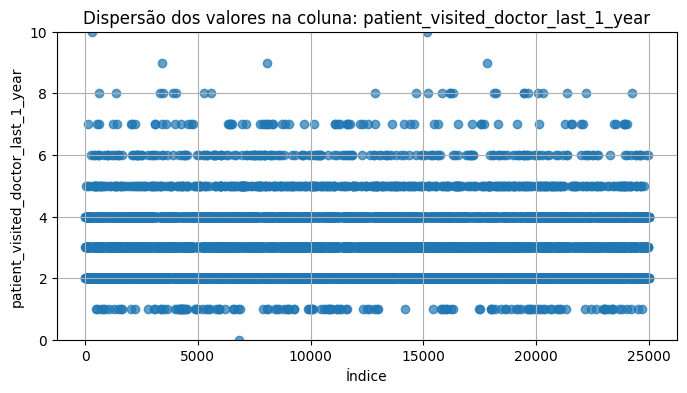

Quantidade de valores NaN encontrados na coluna: 0


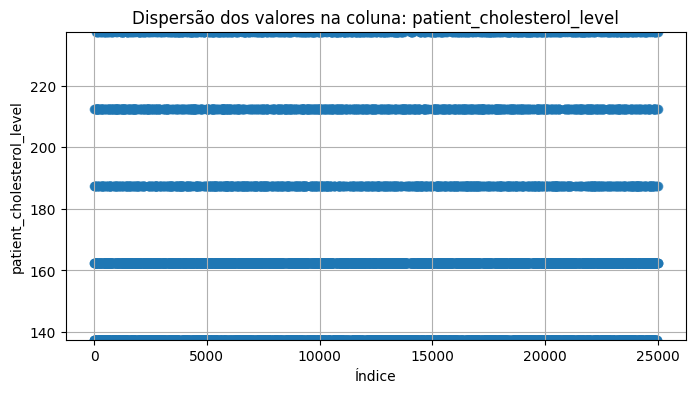

Quantidade de valores NaN encontrados na coluna: 0


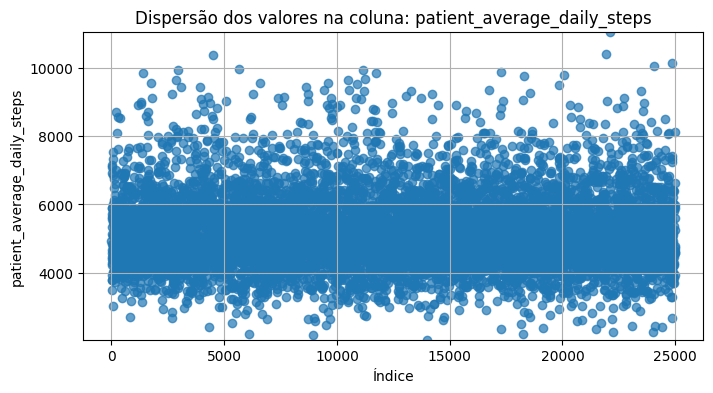

Quantidade de valores NaN encontrados na coluna: 0


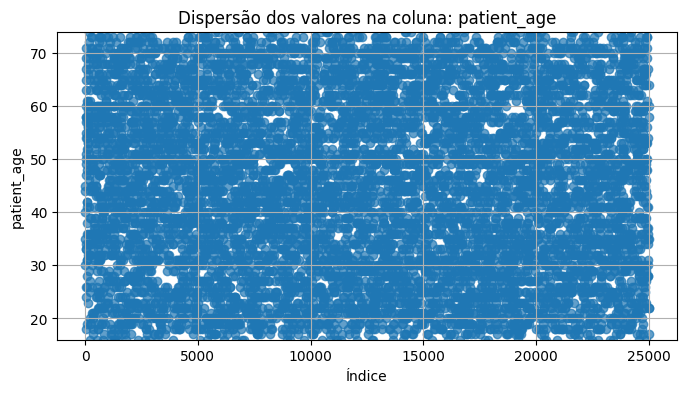

Quantidade de valores NaN encontrados na coluna: 0


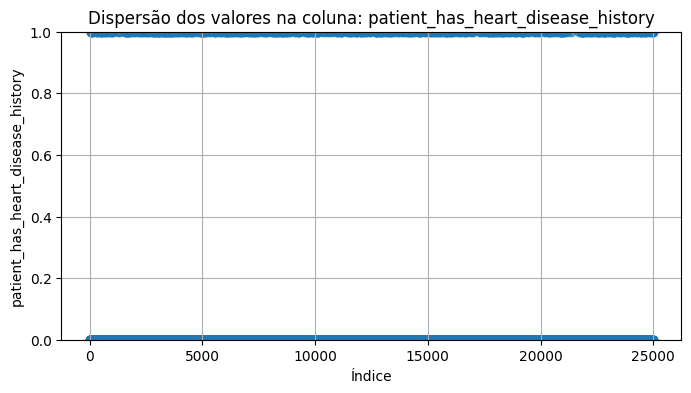

Quantidade de valores NaN encontrados na coluna: 0


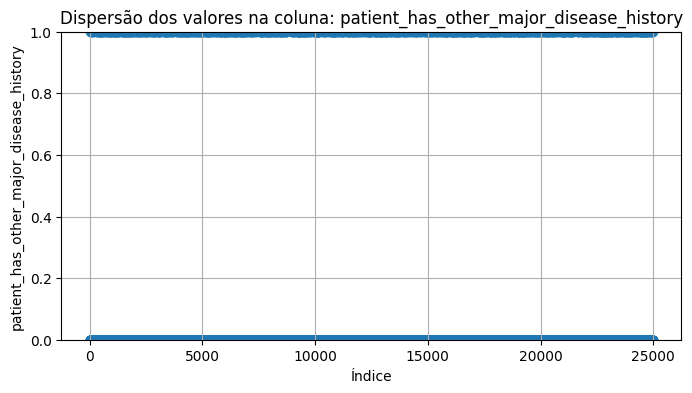

Quantidade de valores NaN encontrados na coluna: 0


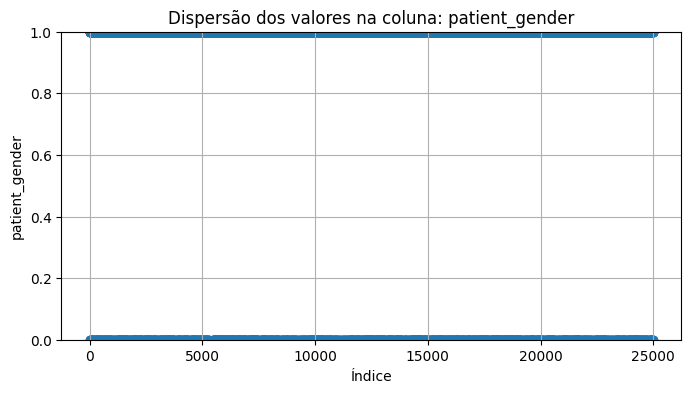

Quantidade de valores NaN encontrados na coluna: 0


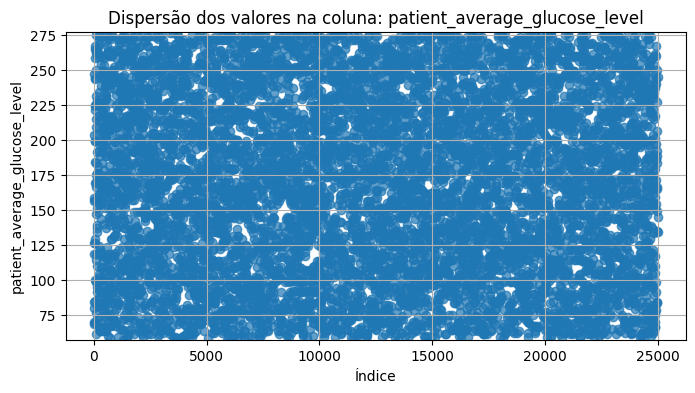

Quantidade de valores NaN encontrados na coluna: 0


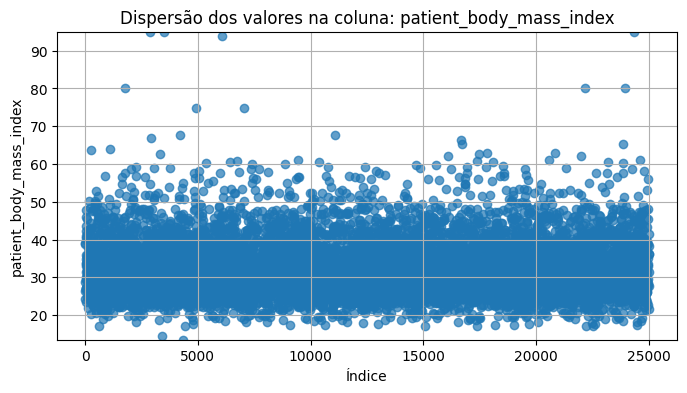

Quantidade de valores NaN encontrados na coluna: 0


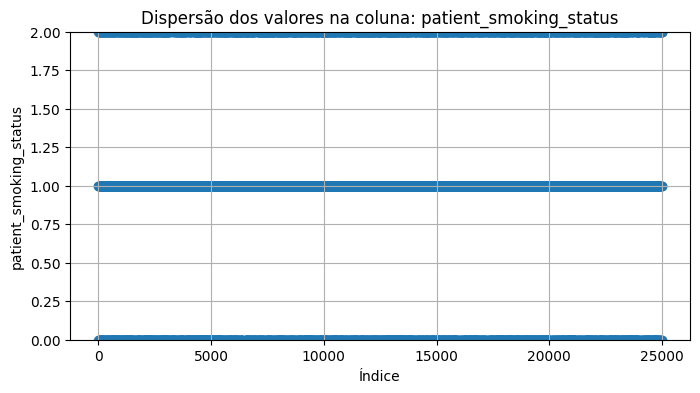

Quantidade de valores NaN encontrados na coluna: 0


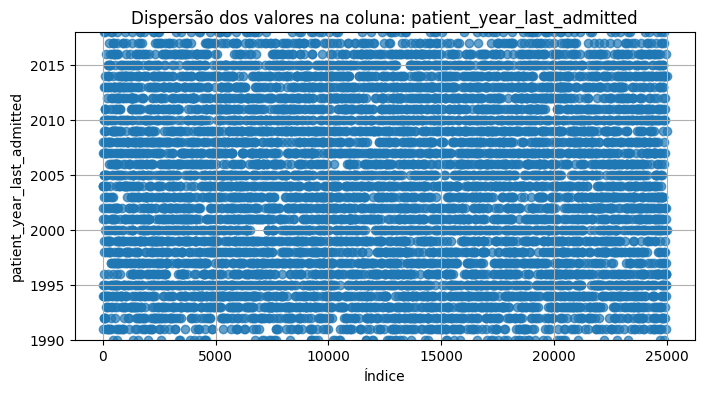

Quantidade de valores NaN encontrados na coluna: 0


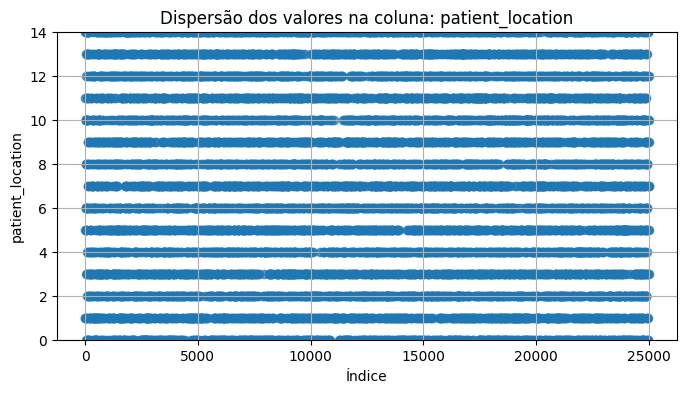

Quantidade de valores NaN encontrados na coluna: 0


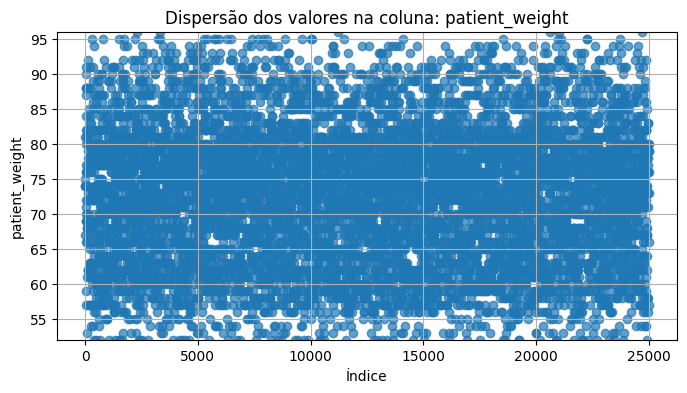

Quantidade de valores NaN encontrados na coluna: 0


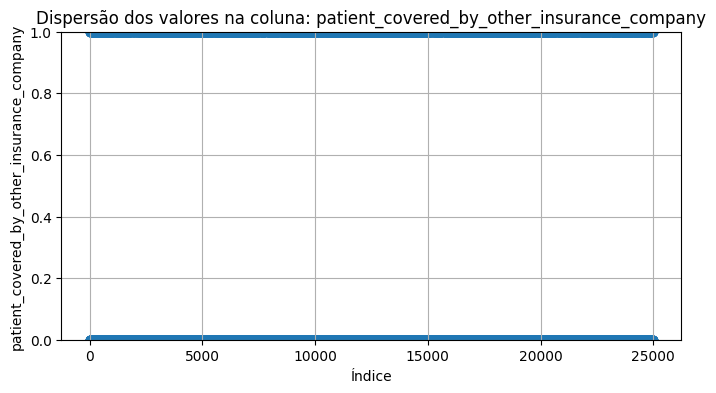

Quantidade de valores NaN encontrados na coluna: 0


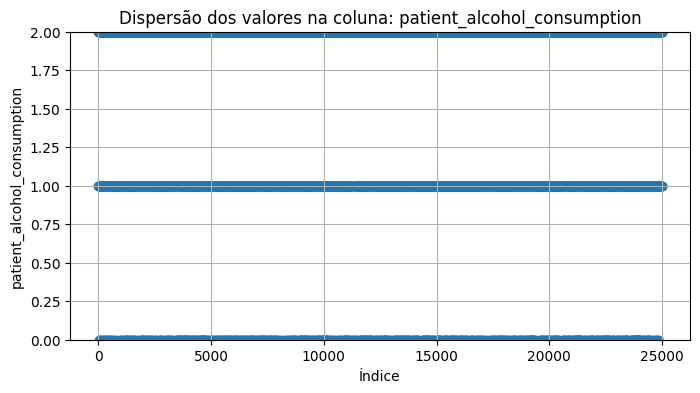

Quantidade de valores NaN encontrados na coluna: 0


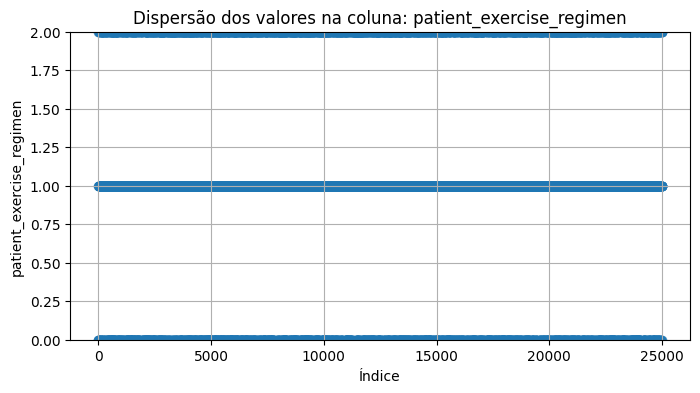

Quantidade de valores NaN encontrados na coluna: 0


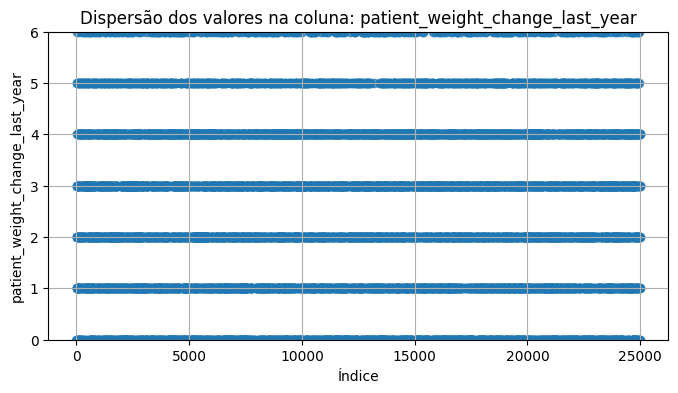

Quantidade de valores NaN encontrados na coluna: 0


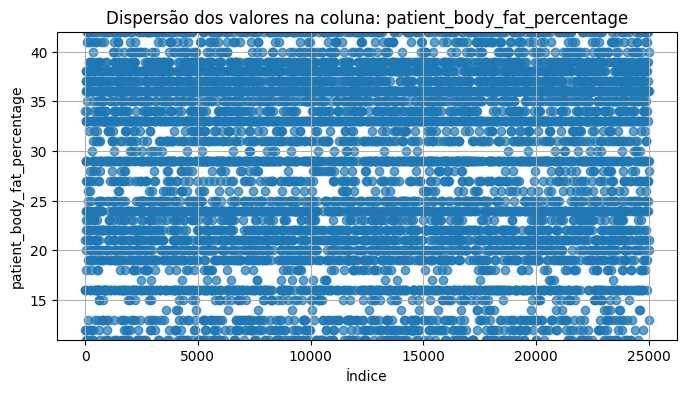

Quantidade de valores NaN encontrados na coluna: 0


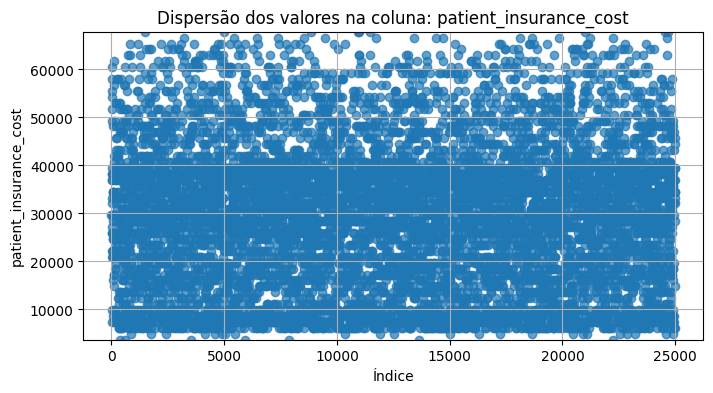

In [12]:
def scatter_columns(df):
    """
    Plota gráficos de dispersão para cada coluna numérica do DataFrame,
    mostrando a dispersão dos valores ao longo do índice.
    """
    numeric_cols = df.select_dtypes(include='number').columns

    for col in numeric_cols:
        plt.figure(figsize=(8, 4))
        plt.scatter(df.index, df[col], alpha=0.7)
        plt.xlabel('Índice')
        plt.ylabel(col)
        plt.title(f'Dispersão dos valores na coluna: {col}')
        plt.grid(True)
        # Define os limites do eixo y para sempre mostrar o range total
        plt.ylim(df[col].min(), df[col].max())
        # Teste para ver se consegui remover valores nulos na etapa de tratamento
        print(f'Quantidade de valores NaN encontrados na coluna: {df[col].isna().sum()}')
        plt.show()
        

scatter_columns(dataFrame)


### Proxima análise: buscar o cliente com seguro mais caro e o mais barato, plotar ambos e análisar suas colunas em formato de barra. Para melhor visibilidade, utilizei o método de escala em LOG, pois com os valores númericos tradicionais muitas colunas não apareciam no gráfico

Com maior custo:
patient_years_with_insurance_with_us              7.0
patient_last_year_regular_checkup                 0.0
patient_participates_in_adventure_sports          0.0
patient_occupation                                0.0
patient_visited_doctor_last_1_year                4.0
patient_cholesterol_level                       212.5
patient_average_daily_steps                    4714.0
patient_age                                      40.0
patient_has_heart_disease_history                 0.0
patient_has_other_major_disease_history           0.0
patient_gender                                    0.0
patient_average_glucose_level                   118.0
patient_body_mass_index                          29.6
patient_smoking_status                            2.0
patient_year_last_admitted                     1992.0
patient_location                                  5.0
patient_weight                                   95.0
patient_covered_by_other_insurance_company        1.0
patient_alc

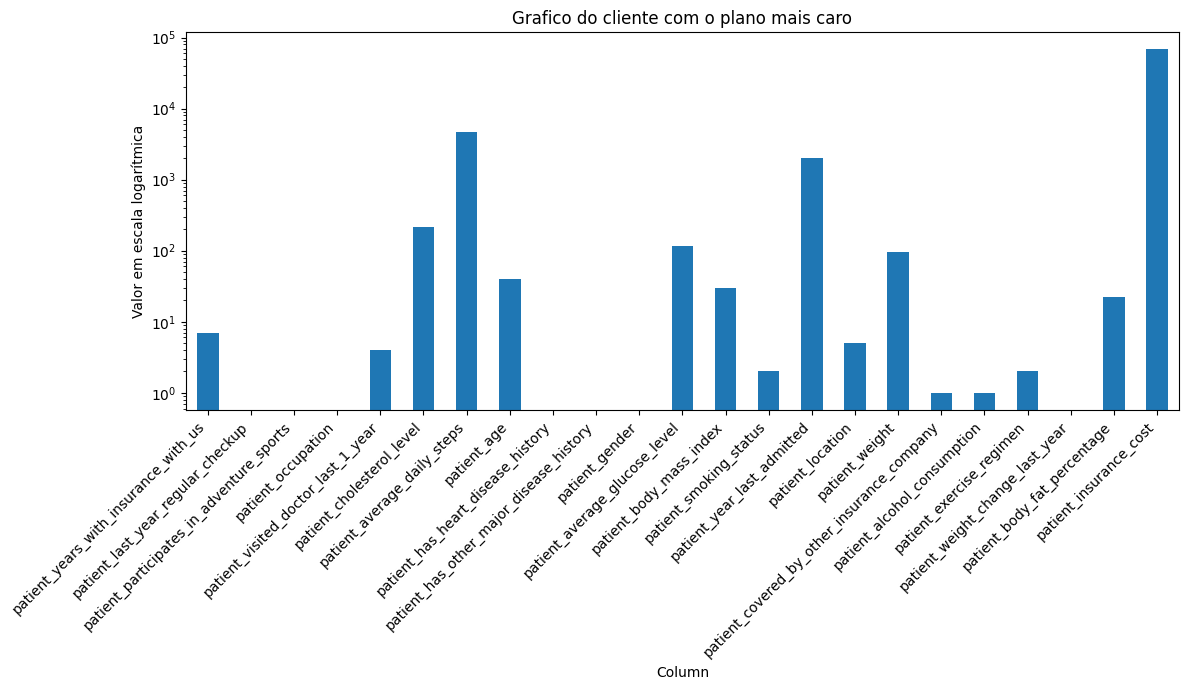

Com menor custo:
patient_years_with_insurance_with_us             3.0
patient_last_year_regular_checkup                1.0
patient_participates_in_adventure_sports         0.0
patient_occupation                               2.0
patient_visited_doctor_last_1_year               3.0
patient_cholesterol_level                      137.5
patient_average_daily_steps                   4761.0
patient_age                                     70.0
patient_has_heart_disease_history                0.0
patient_has_other_major_disease_history          0.0
patient_gender                                   1.0
patient_average_glucose_level                  170.0
patient_body_mass_index                         33.5
patient_smoking_status                           1.0
patient_year_last_admitted                    2018.0
patient_location                                 1.0
patient_weight                                  56.0
patient_covered_by_other_insurance_company       0.0
patient_alcohol_consumption  

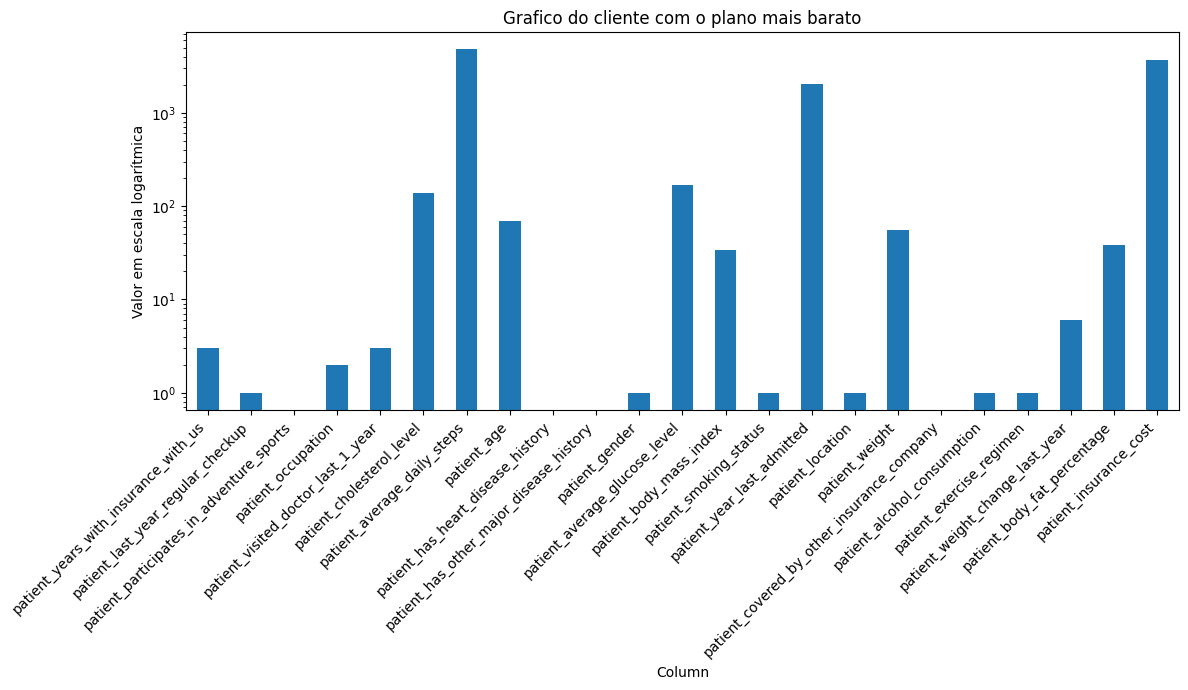

In [8]:
# Identifica o paciente com plano mais caro
if 'patient_insurance_cost' in dataFrame.columns:
    max_cost_row_index = dataFrame['patient_insurance_cost'].idxmax() # Pandas idxmax() identifica o maior valor numerico da coluna alvo

    highest_cost_row = dataFrame.loc[max_cost_row_index]

    print(f"Com maior custo:")
    print(highest_cost_row)

    # Seleciona apenas valores numericos para que não ocorram erros na plotagem do gráfico
    numeric_row_values = highest_cost_row[pd.to_numeric(highest_cost_row, errors='coerce').notna()]


# Plotagem das caracteristicas do cliente com o plano mais caro
if not numeric_row_values.empty:
    plt.figure(figsize=(12, 7)) 
    numeric_row_values.plot(kind='bar')
    plt.yscale('log') # Melhora a visibilidade do grafico, aplicar uma escala logarítmica (logarithmic scale)
    plt.title(f'Grafico do cliente com o plano mais caro')  # Título
    plt.xlabel('Coluna')
    plt.ylabel('Valor em escala logarítmica') # Nome do eixo Y
    plt.xticks(rotation=45, ha='right') # Utilizado para rotacionar os nomes das colunas, já que não teria como ler
    plt.tight_layout() # Ajusta o estilo do layout
    plt.show()


# Identifica paciente com o plano mais barato
if 'patient_insurance_cost' in dataFrame.columns:
    min_cost_row_index = dataFrame['patient_insurance_cost'].idxmin() # Oposto a idxmax(), idxmin() do panda encontra o menor valor numerico da coluna alvo

    
    lowest_cost_row = dataFrame.loc[min_cost_row_index]

    print(f"Com menor custo:")
    print(lowest_cost_row)


    numeric_row_values = lowest_cost_row[pd.to_numeric(lowest_cost_row, errors='coerce').notna()]

# Plotagem das caracteristicas do cliente com o plano mais barato
if not numeric_row_values.empty:
    plt.figure(figsize=(12, 7)) 
    numeric_row_values.plot(kind='bar')
    plt.yscale('log') # Melhora a visibilidade do grafico, aplicar uma escala logarítmica (logarithmic scale)
    plt.title(f'Grafico do cliente com o plano mais barato') # Título
    plt.xlabel('Coluna')
    plt.ylabel('Valor em escala logarítmica') # Nome do eixo Y
    plt.xticks(rotation=45, ha='right') # Utilizado para rotacionar os nomes das colunas, já que não teria como ler
    plt.tight_layout() # Ajusta o estilo do layout
    plt.show()


### Ate este ponto, o objetivo foi analisar os dados de maneira visual para ajudar na escolha de um modelo.

## Modelo preditivo de regressão escolhido:
>Regressao Linear


### Fazendo a Regressão Linear no estilo 30/70 (30% de treino e 70% para teste do modelo).
#### O eixo X são as variáveis implicitas, nesse caso todas as colunas exceto o custo do plano
#### O eixo Y é o custo do plano
#### similar a utilizar uma função de x para encontrar y, F(X)=Y


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

def regressao_linear_70_30(dataFrame, random_state=42):
    """
    Realiza regressão linear com scikit-learn utilizando 70% dos dados para treino e 30% para teste.

    Parâmetros:
        dataFrame: DataFrame do pandas contendo os dados.
        random_state: semente para reprodutibilidade.

    Retorna:
        modelo: modelo LinearRegression treinado.
        score_treino: R² no conjunto de treino.
        score_teste: R² no conjunto de teste.
        y_pred: previsões no conjunto de teste.
        X_teste: features do conjunto de teste.
        y_teste: valores reais do conjunto de teste.
    """
    # Define as colunas de X excluindo a coluna alvo
    colunas_X = [col for col in dataFrame.columns if col != 'patient_insurance_cost']
    X = dataFrame[colunas_X]
    y = dataFrame['patient_insurance_cost']

    X_treino, X_teste, y_treino, y_teste = train_test_split(
        X, y, test_size=0.3, random_state=random_state
    )

    modelo = LinearRegression()
    modelo.fit(X_treino, y_treino)

    score_treino = modelo.score(X_treino, y_treino)
    score_teste = modelo.score(X_teste, y_teste)
    y_pred = modelo.predict(X_teste)

    return modelo, score_treino, score_teste, y_pred, X_teste, y_teste

modelo, score_treino, score_teste, y_pred, X_teste, y_teste = regressao_linear_70_30(dataFrame)
print("R² treino:", score_treino)
print("R² teste:", score_teste)

R² treino: 0.9409596785309977
R² teste: 0.9387206693647795


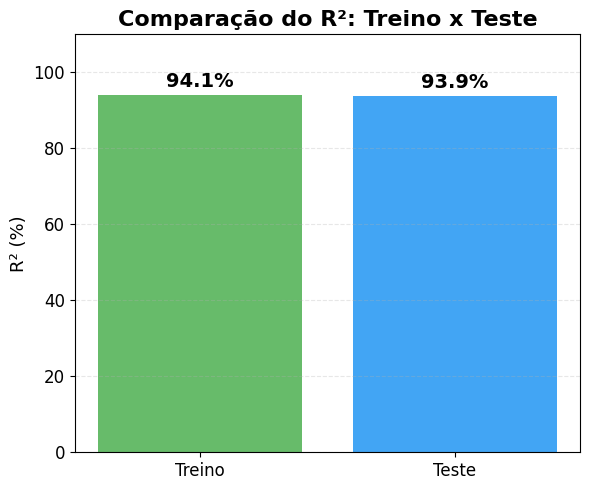

In [15]:
def plot_r2_bar(score_treino, score_teste):

    labels = ['Treino', 'Teste']
    scores = [score_treino, score_teste]

    plt.figure(figsize=(6, 5))
    bars = plt.bar(labels, [s*100 for s in scores], color=['#4CAF50', '#2196F3'], alpha=0.85)

    # Adiciona valor em cima das barras, enfatizando as altas porcentagens
    for bar, score in zip(bars, scores):
        plt.text(
            bar.get_x() + bar.get_width() / 2, 
            bar.get_height() + 1, 
            f"{score*100:.1f}%", 
            ha='center', 
            va='bottom', 
            fontsize=14, 
            fontweight='bold',
            color='black'
        )

    plt.ylim(0, 110)
    plt.ylabel('R² (%)', fontsize=13)
    plt.title('Comparação do R²: Treino x Teste', fontsize=16, fontweight='bold')
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

plot_r2_bar(score_treino, score_teste)
